In [396]:
import mplfinance as mpf
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import concurrent.futures

In [397]:
def get_time_series():
    API_key = 'MCO3JQL81ATB1YZ0'
    time = TimeSeries(key = API_key,output_format='pandas')
    return time

In [398]:
def average(lst): #calculates and returns mean of a list
    if len(lst):
        return sum(lst) / len(lst)
    else:
        return sum(lst)

In [399]:
def get_data_frame(ticker, cash, vwap=0, twap=0):
    time = get_time_series()
    data = time.get_intraday(symbol=ticker,interval='1min',outputsize='full')
    df = data[0]
    df = df.rename(columns={"1. open":"Open","2. high":"High","3. low":"Low","4. close":"Close","5. volume":"Volume"})
    result = [group[1] for group in df.groupby(df.index.day)]
    
    for index, dataframe in enumerate(result):
        index += 1
        
        dataframe = dataframe.loc[(dataframe.index.hour >= 9)]
        dataframe = dataframe.loc[(dataframe.index.hour <= 15)]
        dataframe = dataframe.resample('5T').agg({'Open':'first','High':'max','Low':'min','Close':'last','Volume':'sum'})
        
        
        if vwap:    
            dataframe['VWAP'] = (((dataframe['High']+dataframe['Low']+dataframe['Close'])*dataframe['Volume']/3).cumsum())/dataframe['Volume'].cumsum()
        if twap:
            df_open = dataframe['Open'].tolist()
            df_high = dataframe['High'].tolist()
            df_low = dataframe['Low'].tolist()
            df_close = dataframe['Close'].tolist()
            
            new_list = []
            
            
            for i in range(0, len(df_open)):
                twap_data = (average(df_open[0:i])+average(df_high[0:i])+average(df_low[0:i])+average(df_close[0:i]))/4
                new_list.append(twap_data)
            
            new_list[0] = df_open[0]
            
            
            dataframe['TWAP'] = new_list
            
        
        dataframe = dataframe.dropna()
        
        
        #print(dataframe['TWAP'].tolist())
        #print(dataframe['TWAP'])
        #type(dataframe['TWAP'])
        yield dataframe
     



In [400]:
def plot_data_frame(ticker, cash, add_vwap=0, add_twap=0): # by default, add_vwap and add_twap are false
    
    #generator object
    dataframe= get_data_frame(ticker, cash, add_vwap, add_twap)
    
    #loops through dataframe for each day
    for df in dataframe:
        #print(df)
        #plots is a list of our mpf plots
        plots = []
        
        if add_vwap:
            vwap = mpf.make_addplot(df['VWAP'])
            plots.append(vwap)
        
        if add_twap:
            twap = mpf.make_addplot(df['TWAP'])
            plots.append(twap)
            
        #
        mpf.plot(df,addplot=plots,type='candle',style='yahoo',volume=True,title=f"{df.index.date[0]} {ticker}")
        
        #Strategies Go Here
        twap_strategy(0, 60, 3, 6, df['TWAP'].tolist(), df['Open'].tolist()) #first 60 minutes, execute over three periods, pass vwap list, df
    

In [401]:
#start and end define the specified time period
#nbuckets tells how many buckets to divide trade into
#ntrades is how many trades we want to make over the time period
#t_list is the list of TWAP data 
#df is the entire dataframe
def twap_strategy(start, end, nbuckets, ntrades, t_list, o_list): 
    #print(t_list)
    #print(o_list)
    trades_per_bucket = ntrades/nbuckets
    for bucket in range(nbuckets):
        for trade in range(int(trades_per_bucket)):
            if(time_retrieve(t_list,start) <= time_retrieve(o_list,start)):
                print('Purchased 1 share')
            
        
    print(time_retrieve(t_list,start))
    print(time_retrieve(t_list,end))

In [402]:
def multi(ticker, cash, cores, add_vwap=0, add_twap=0):
    
    with concurrent.futures.ProcessPoolExecutor(cores) as executor:
        
        return plot_data_frame(ticker, cash, add_vwap, add_twap)

In [403]:
def timetolist(time): 
    #function converts a time in minutes to integer to reference list where elements are stored in 5 min intervals    
    return time/5

In [404]:
def time_retrieve(l, time): #where l is a list, time is time in minutes (from 9:00), returns value from list
    return l[int(timetolist(time))]

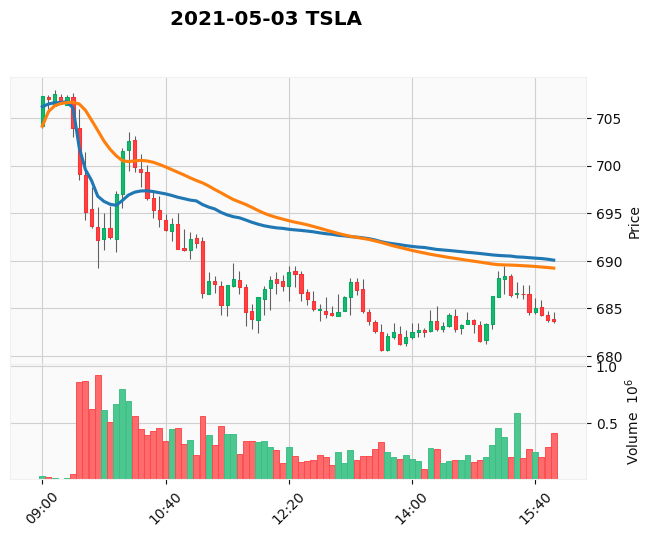

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
704.16
701.0482708333334


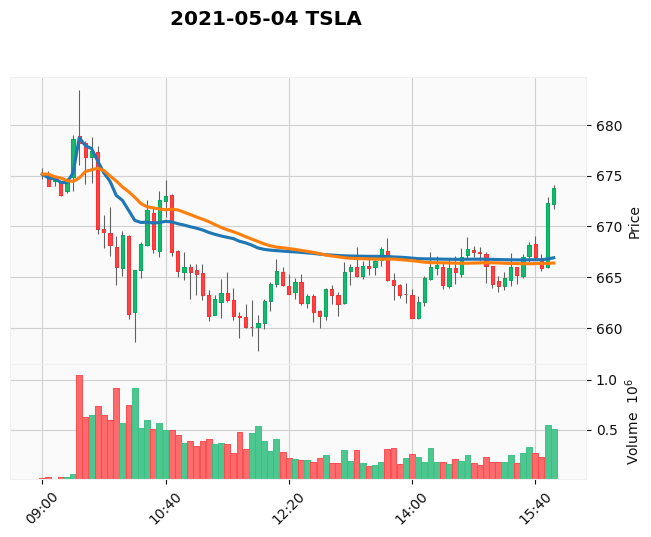

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
675.15
674.4720562499999


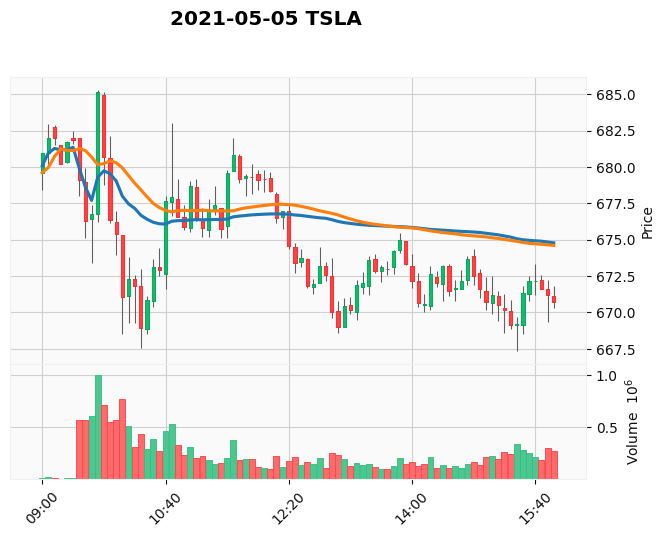

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
679.6
680.2881749999999


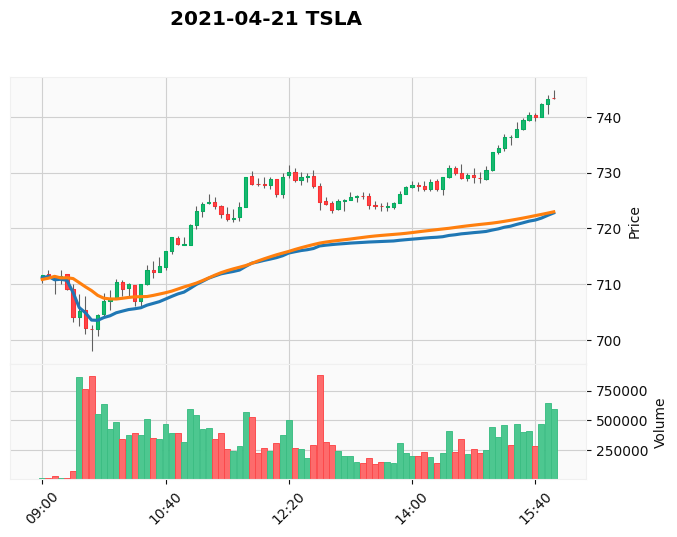

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
710.86
707.3516145833333


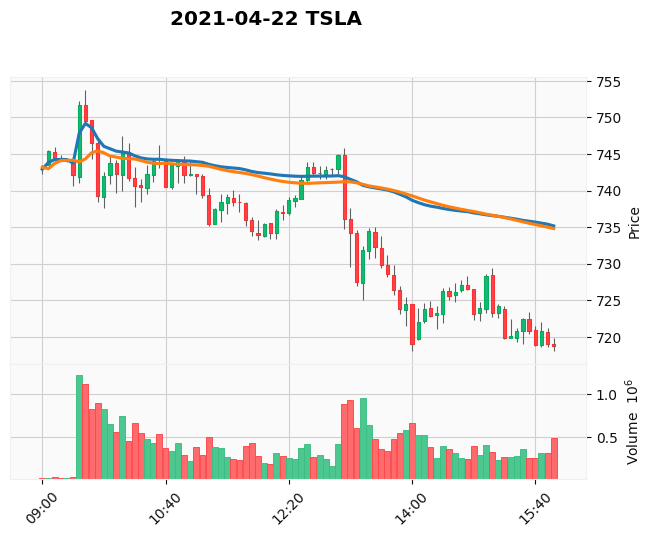

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
743.19
744.572525


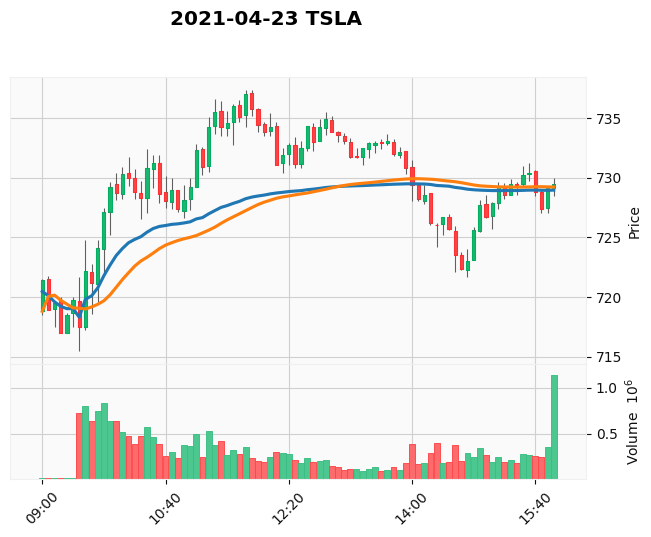

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
718.8
720.8175041666666


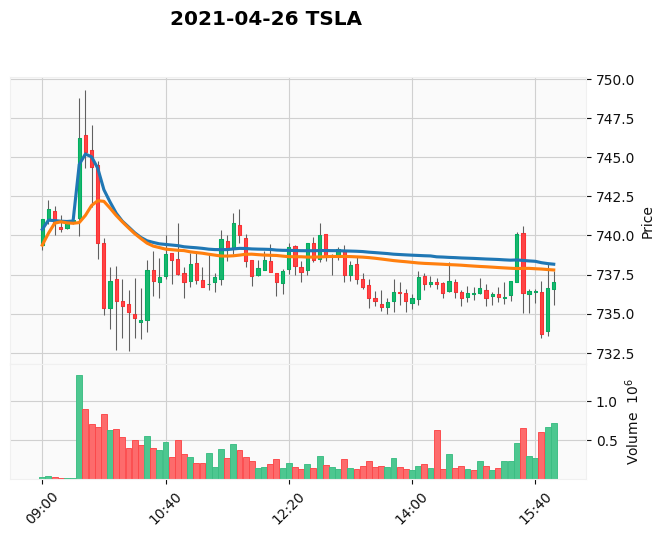

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
739.38
741.2762937499999


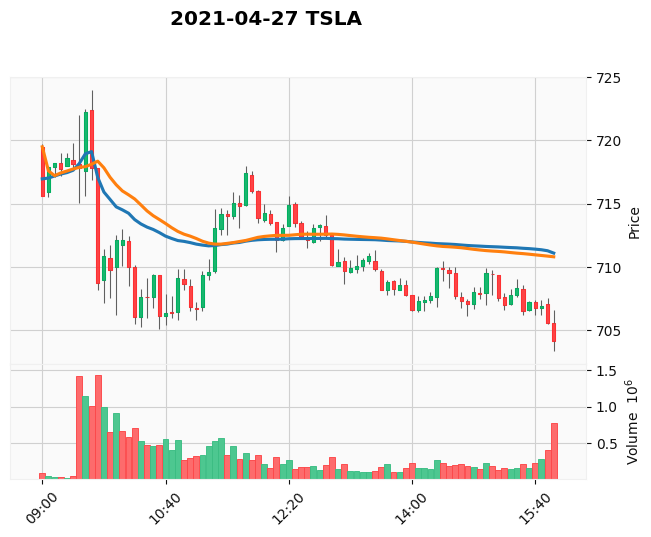

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
719.5
716.4972916666667


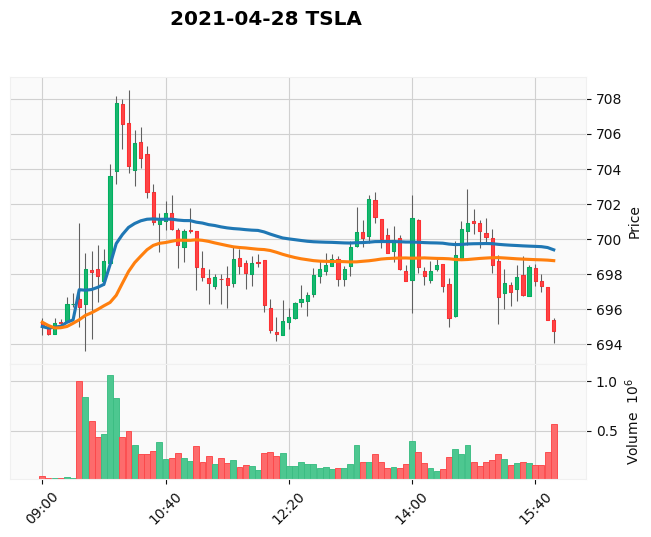

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
695.25
696.7870541666667


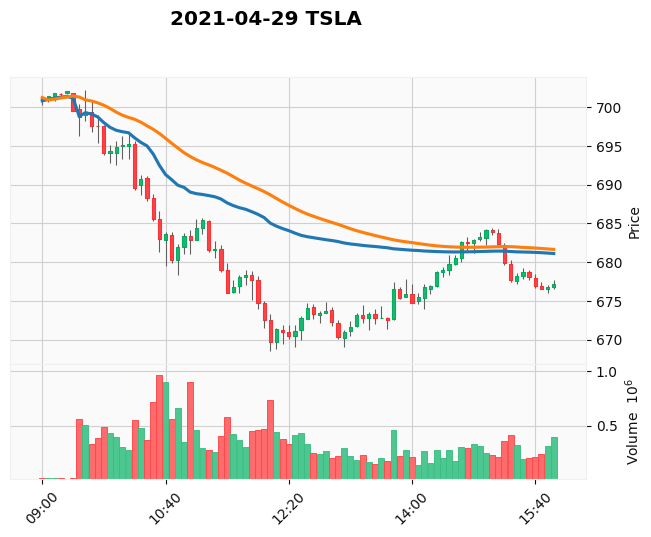

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
701.25
699.3693375


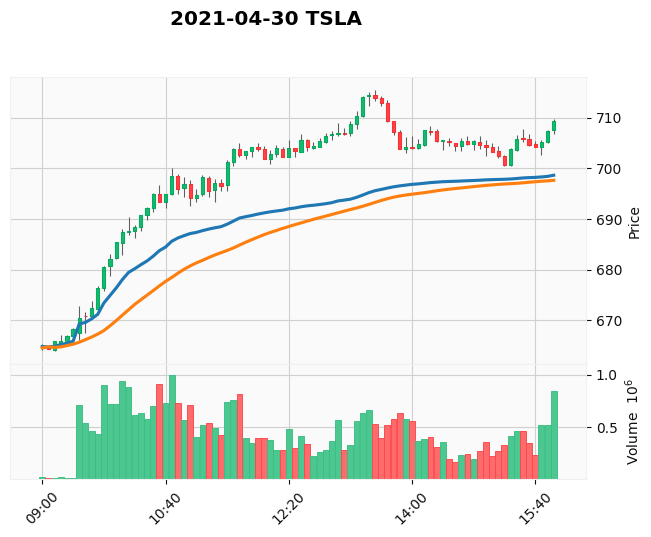

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
664.55
669.9402020833334


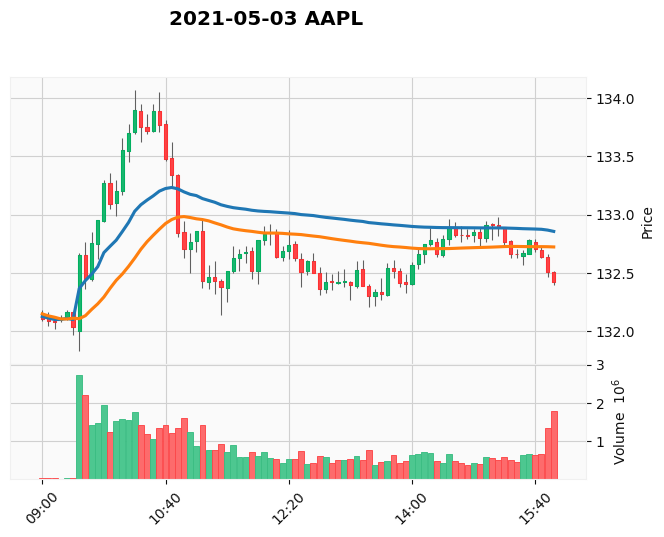

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
132.15
132.4374208333333


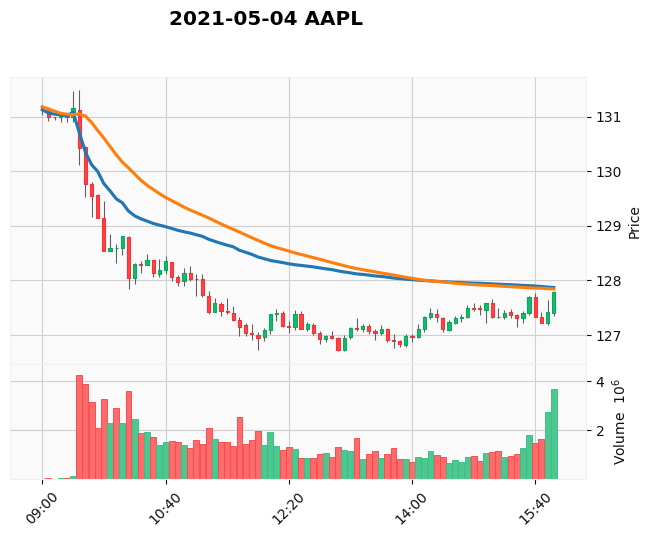

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
131.18
130.30027291666667


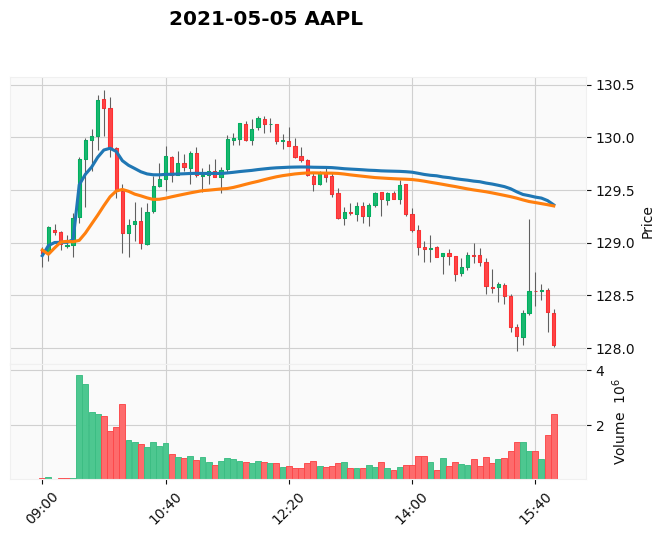

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
128.93
129.49008958333334


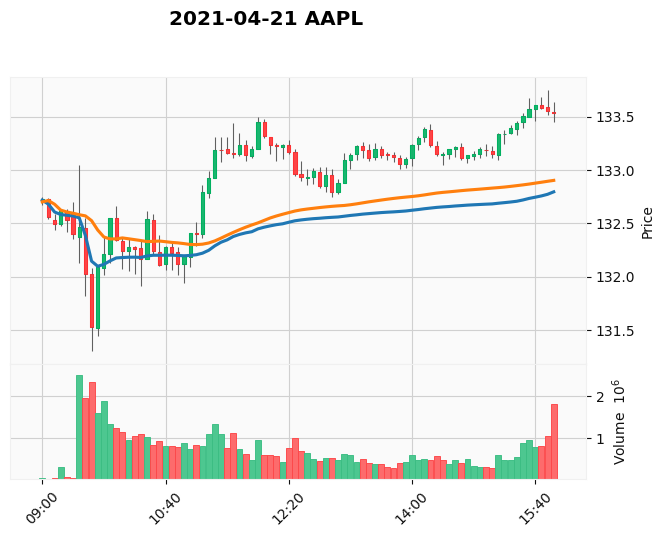

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
132.7
132.3530270833333


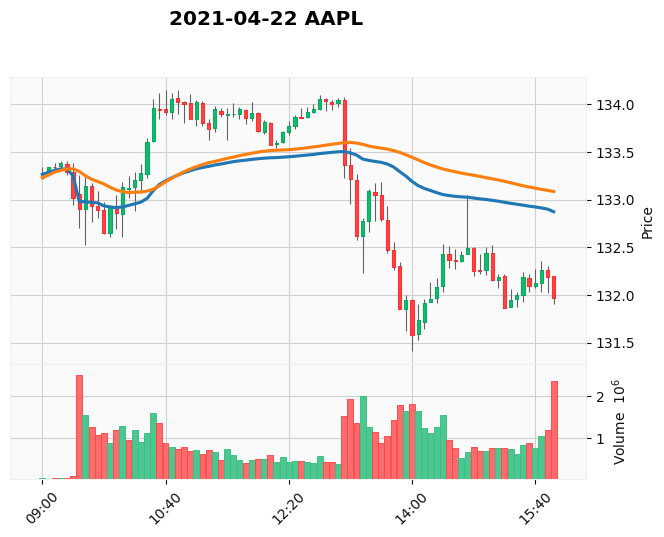

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
133.23
133.09968750000002


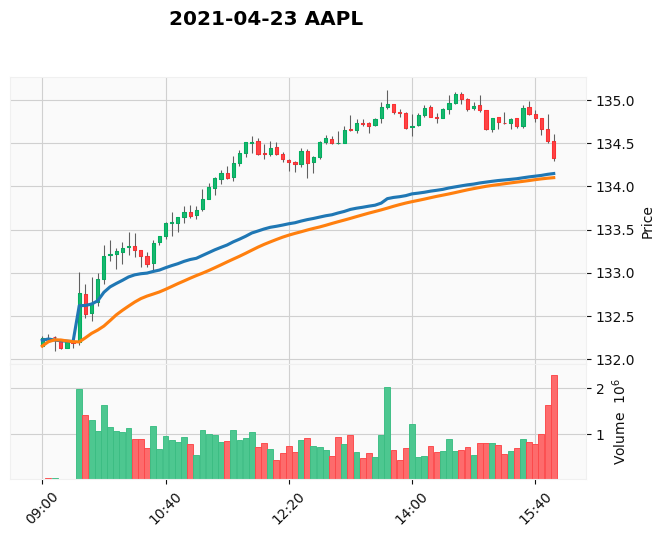

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
132.15
132.5106375


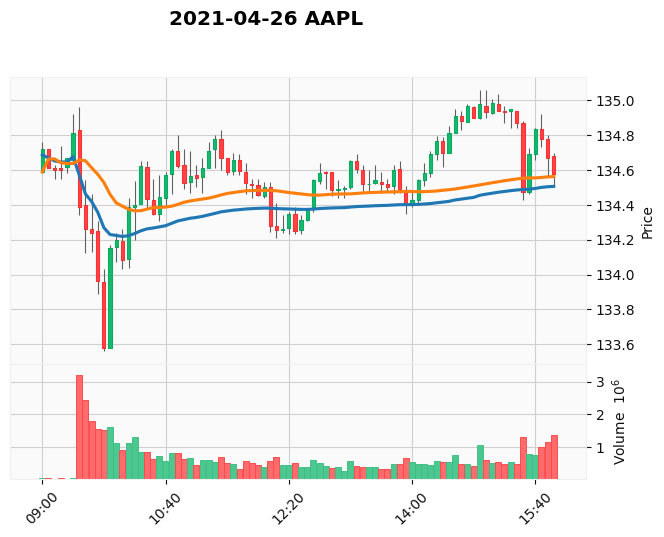

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
134.589
134.41118333333333


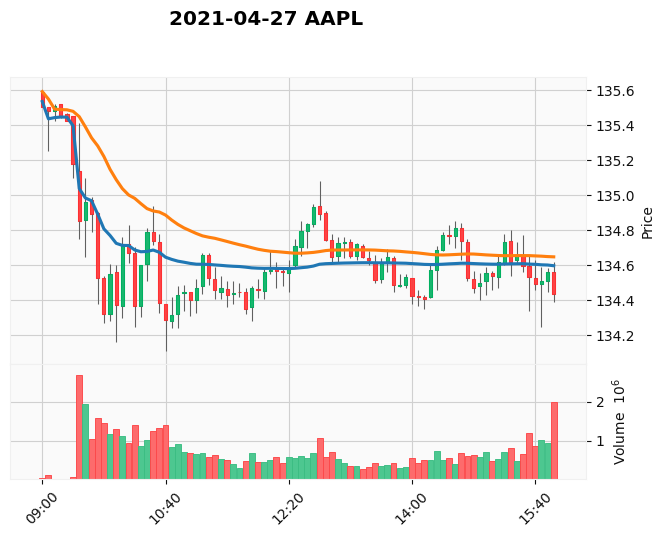

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
135.59
135.08782499999998


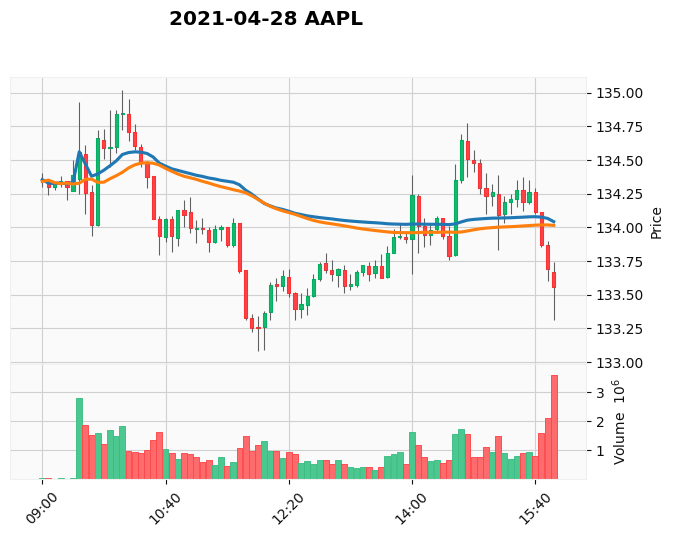

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
134.34
134.38260416666668


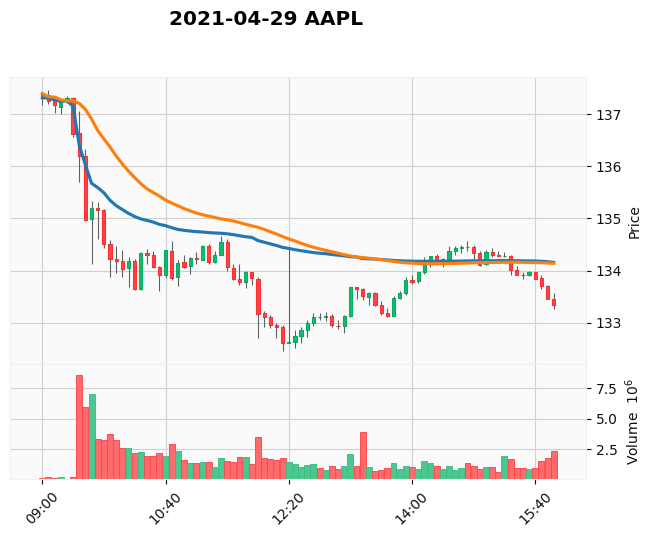

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
137.4
136.19904375


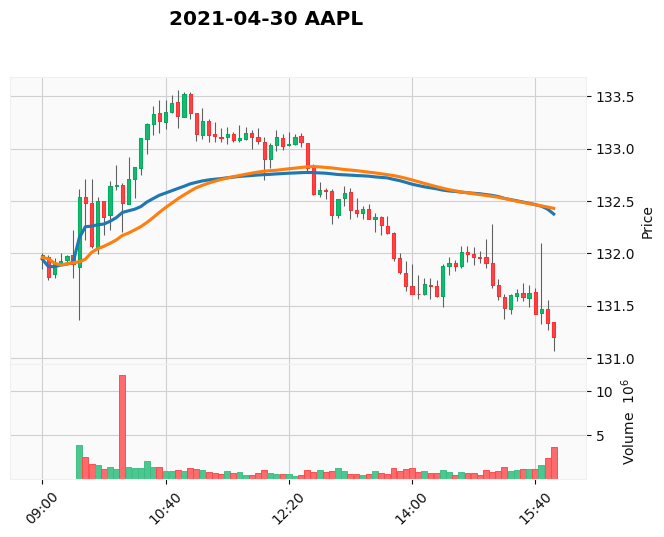

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
131.96
132.12682916666665


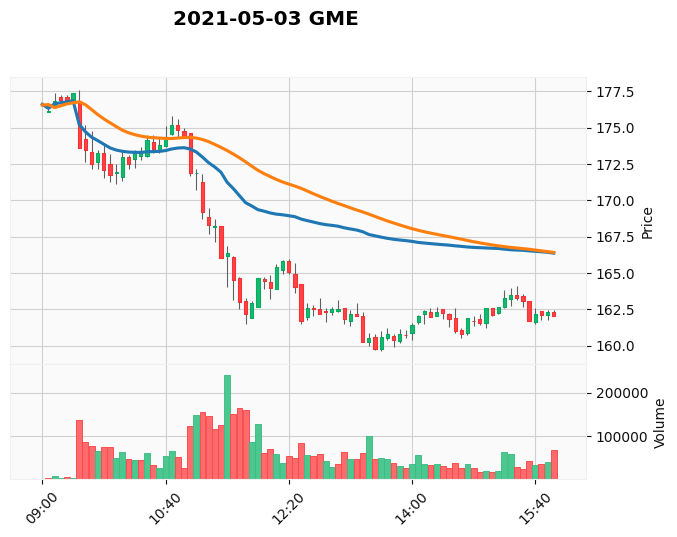

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
176.55
175.0693229166667


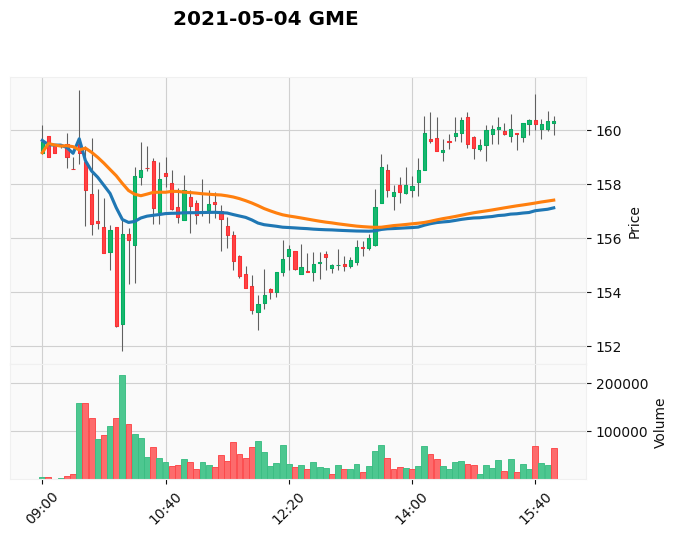

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
159.16
158.30622083333333


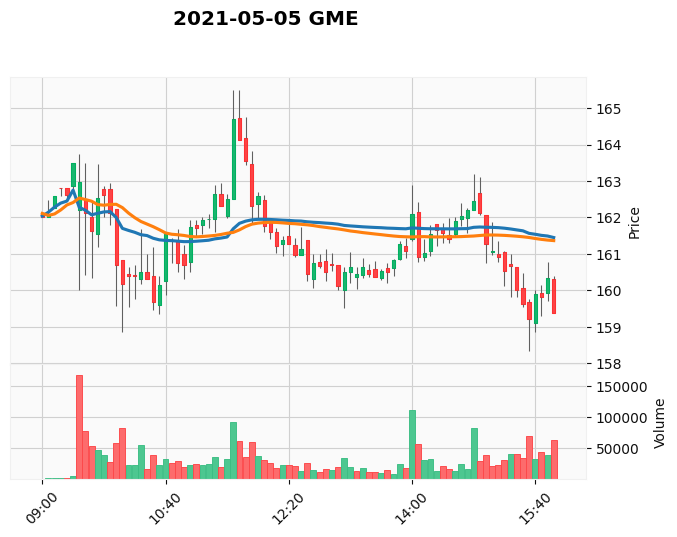

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
162.11
162.36023125000003


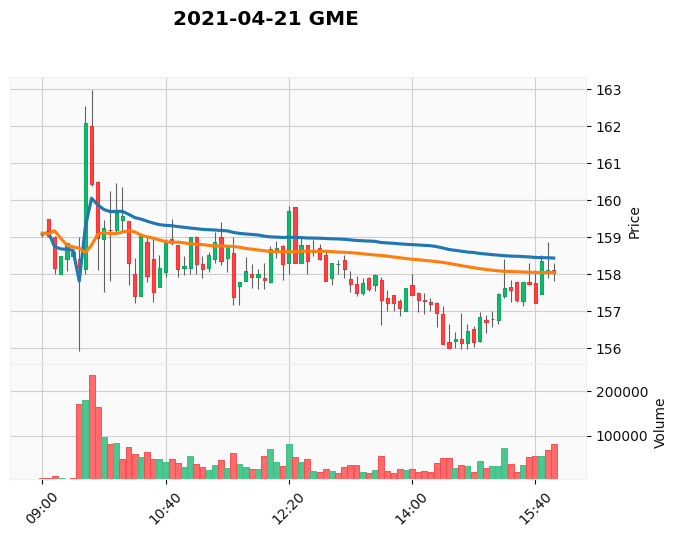

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
159.11
159.09637291666667


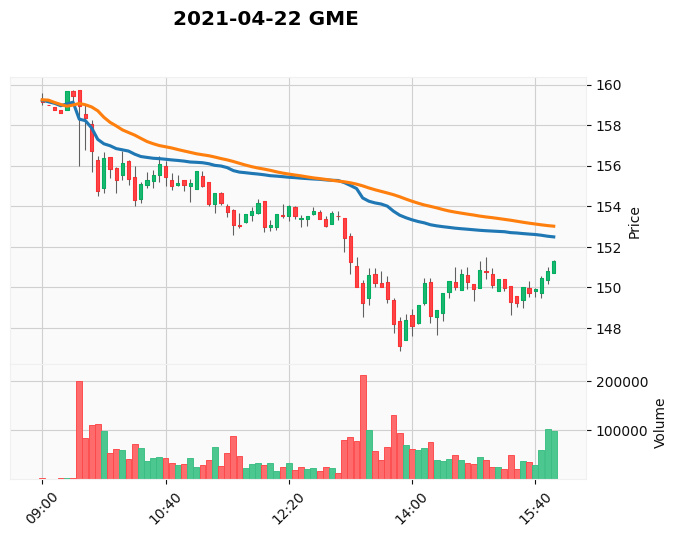

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
159.25
157.96207916666665


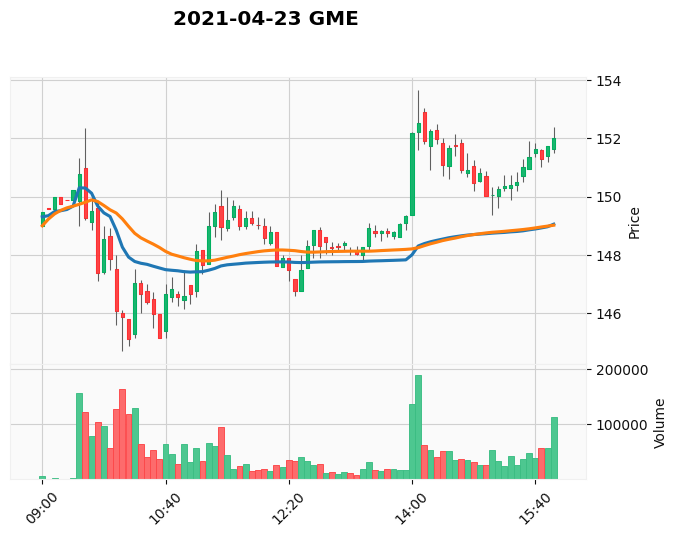

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
149.0
149.43767291666666


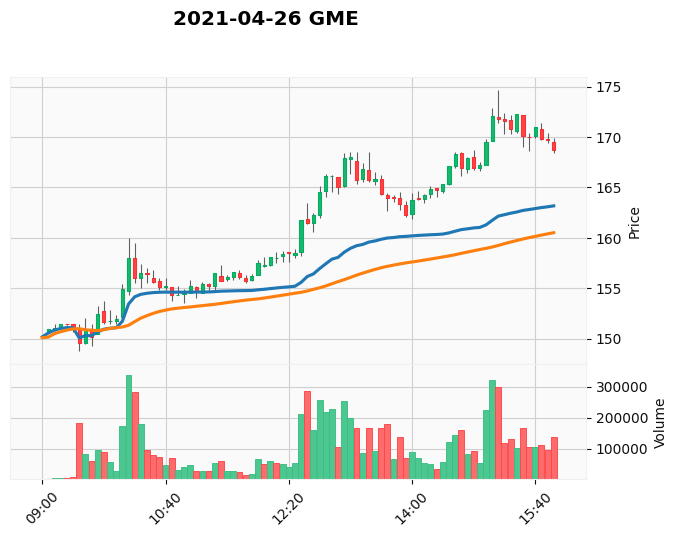

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
150.1
151.0964125


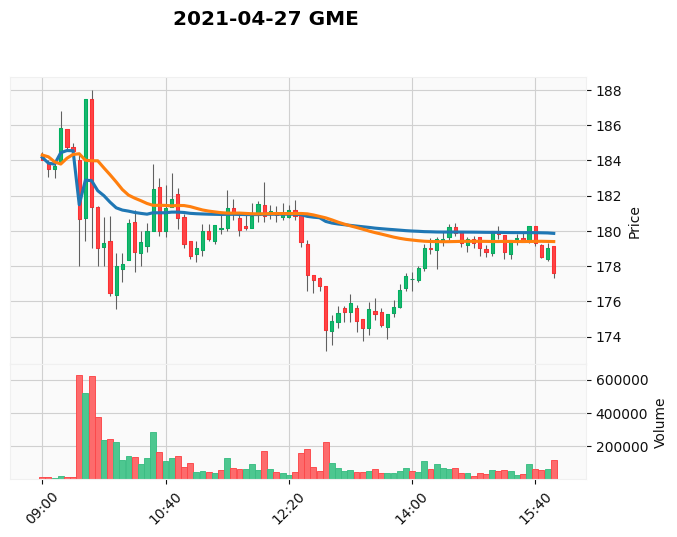

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
184.3
182.77314375


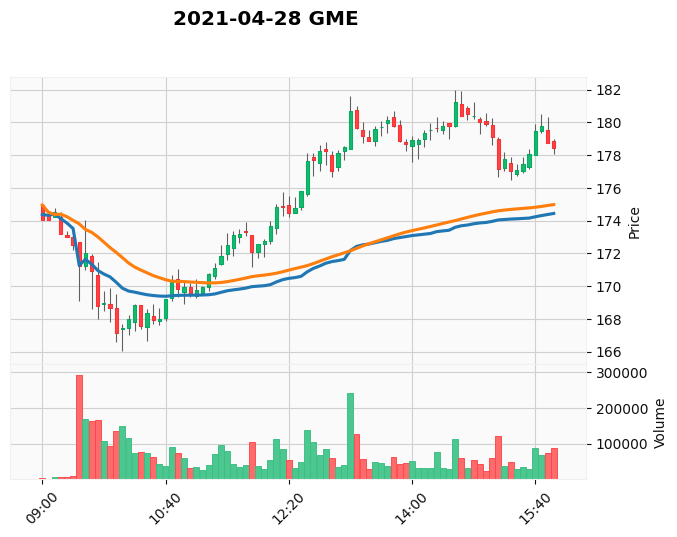

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
174.95
172.05633125000003


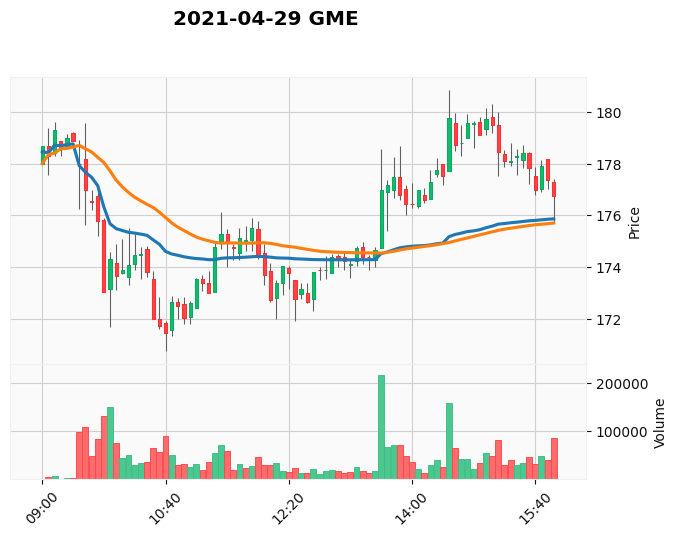

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
178.01
177.36448125


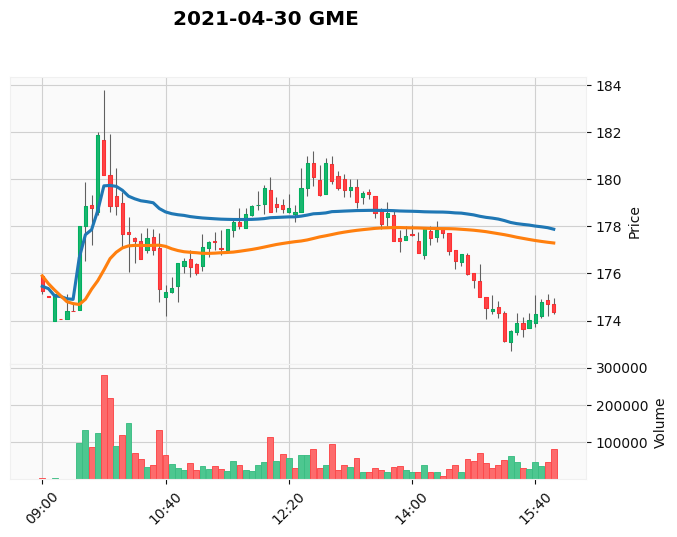

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
175.9
176.90267708333332


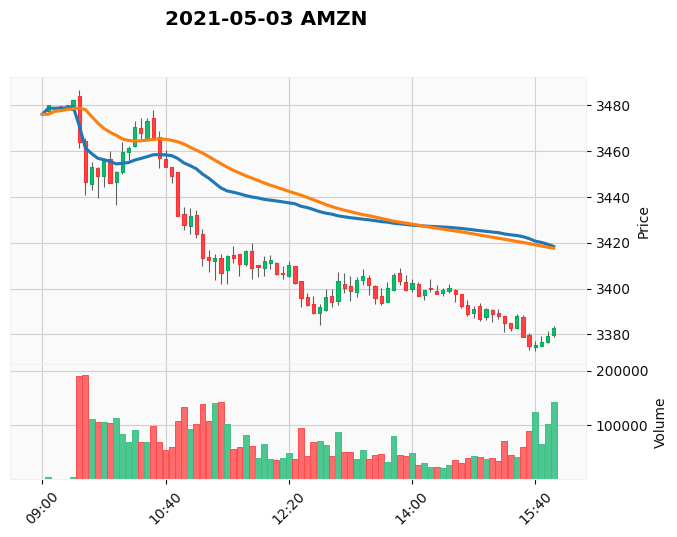

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
3476.0
3466.8193270833335


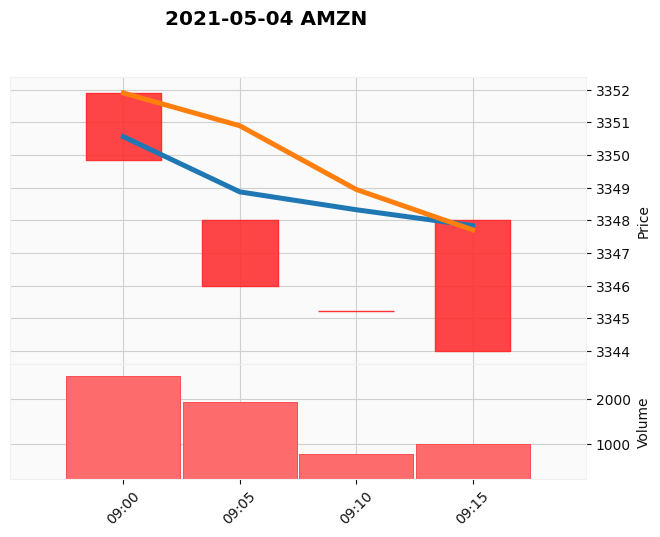

Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
Purchased 1 share
3351.9


IndexError: list index out of range

In [405]:
def main(argv):
    
    cores = int(argv[-1])
    
    argv.pop()

    for stock in argv:
        multi(stock, 1000, cores, add_vwap=1, add_twap=1)

#Default execution
if __name__ == '__main__':
    #list of tickers
    args = ['TSLA','AAPL','GME','AMZN','MSFT']
    cores = '1';
    
    args.append(cores)
    
    #call main
    main(args)
